<a href="https://colab.research.google.com/github/Felipe34515/Trabajos-BI/blob/main/Proyecto_Anal%C3%ADtica_de_textos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Proyecto Analítica de textos**

## Integrantes:
- Felipe Rueda - 202010903
- Santiago Pardo - 202013025
- Luis Plazas - 202013155

## Contexto:

El Ministerio de Comercio, Industria y Turismo de Colombia, la Asociación Hotelera y
Turística de Colombia – COTELCO, cadenas hoteleras de la talla de Hilton, Hoteles Estelar,
Holiday Inn y hoteles pequeños ubicados en diferentes municipios de Colombia están
interesados en analizar las características de sitios turísticos que los hacen atractivos para
turistas locales o de otros países, ya sea para ir a conocerlos o recomendarlos. De igual
manera, quieren comparar las características de dichos sitios, con aquellos que han
obtenido bajas recomendaciones y que están afectando el número de turistas que llegan a
ellos. Adicionalmente, quieren tener un mecanismo para determinar la calificación que
tendrá un sitio por parte de los turistas y así, por ejemplo, aplicar estrategias para identificar
oportunidades de mejora que permitan aumentar la popularidad de los sitios y fomentar el
turismo.

Esos actores de turismo prepararon dos conjuntos de datos con reseñas de sitios turísticos.
Cada reseña tiene una calificación según el sentimiento que tuvo el turista al visitarlo. Estos
actores quieren lograr un análisis independiente de los conjuntos de datos y al final del
proyecto discutir sobre los grupos de científicos de datos e ingenieros de datos que
acompañarán el desarrollo real de este proyecto.






In [38]:
# @title Librerías a utilizar

import pandas as pd
import matplotlib.pyplot as plt
import joblib
from joblib import dump, load
import numpy as np

import spacy
import nltk
from nltk.corpus import stopwords
import torch
import torchtext
from collections import Counter

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB

In [10]:
# @title Instalar dependencias (Solo instalar una vez)

# !pip install spacy
# !python -m spacy download es_core_news_sm
# !pip install nltk
# nltk.download('punkt')
# nltk.download('averaged_perceptron_tagger')
# nltk.download('wordnet')

In [42]:
# @title Carga de datos
df = pd.read_csv("tipo1_entrenamiento_estudiantes.csv", delimiter=",")
df

,Review,Class
0,Nos alojamos en una casa alquilada en la ciuda...,4
1,"La comida está bien, pero nada especial. Yo te...",3
2,"En mi opinión, no es una como muchos usuarios ...",3
3,esta curiosa forma que asemeja una silla de mo...,4
4,Lo mejor era la limonada. Me gusto la comida d...,2
...,...,...
7870,El motivo de mi estancia fue porque vine a un ...,3
7871,Es difícil revisar el castillo porque apenas p...,3
7872,Si vas a Mérida no puedes perderte de este lug...,5
7873,"Este imperdible sitio, que lleva el nombre del...",5


# **(10%) 1. Entendimiento del negocio y enfoque analítico.**

Basado en la descripción que proporcionaste, aquí están los posibles objetivos del proyecto, criterios de éxito y el enfoque analítico:

## **Objetivos del proyecto**:
1. Analizar las características de los sitios turísticos que los hacen atractivos para los turistas locales y extranjeros.
2. Comparar las características de los sitios turísticos populares con aquellos que han obtenido bajas recomendaciones.
3. Desarrollar un mecanismo para predecir la calificación que un sitio recibirá de los turistas.
4. Identificar oportunidades de mejora para aumentar la popularidad de los sitios y fomentar el turismo.

## **Criterios de éxito**:
1. Identificación precisa de las características que hacen atractivos a los sitios turísticos.
2. Precisión en la comparación de sitios turísticos populares y menos populares.
3. Precisión en la predicción de las calificaciones de los sitios turísticos.
4. Identificación efectiva de oportunidades de mejora para los sitios turísticos.

## **Enfoque analítico**:
1. Análisis descriptivo de los datos para entender las características de los sitios turísticos.
2. Análisis comparativo para identificar las diferencias entre los sitios turísticos populares y menos populares.
3. Modelado predictivo (como la regresión, las máquinas de vectores de soporte o las redes neuronales) para predecir las calificaciones de los sitios turísticos.
4. Análisis de las oportunidades de mejora utilizando técnicas como el análisis de causa raíz o el análisis FODA (Fortalezas, Oportunidades, Debilidades, Amenazas).

## Integrantes del grupos de la clase de estadistica:
- Isabella Nova
- Ana Sanchez


| Título | Descripción |
|-----------|-----------|
| Oportunidad/problema Negocio  | Valor 2   |
| Enfoque analítico (Descripción del requerimiento desde el punto de vista de aprendizaje automático) e incluya las técnicas y algoritmos que propone utilizar.  | Valor 5   |
| Organización y rol dentro de ella que se beneficia con la oportunidad definida   | Valor 5   |
| Contacto con experto externo al proyecto y detalles de la planeación | Valor 5   |




# **(20%) 2. Entendimiento y preparación de los datos.**

## **2.1 Análisis de los datos**

- Conplejitud: Podemos ver que mo hay filas vacias

In [43]:
df.isnull().sum()

Review    0
Class     0
dtype: int64

- Unicidad : Podemos ver que hay 71 datos repetidos

In [44]:
df.shape

(7875, 2)

In [45]:
df['Review'].nunique()

7804

- Nulos: No hay datos nulos
- Validez: Todos los datos son validos

## **2.2 Limpieza de datos**

In [25]:
# @title Quitar datos duplicados
df = df.drop_duplicates()
df.shape

(7804, 2)

In [46]:
# @title Quitar números, signos de puntuación y mayusculas
df = df.replace(r'\d', '', regex=True)  # Eliminar números
df = df.replace(r'[^\w\s]', '', regex=True)  # Eliminar signos de puntuación
df['Review'] = df['Review'].str.lower()  # Convertir todas las letras a minúsculas

### Quitar las Stop Words

Las "stop words" en un modelo de procesamiento de lenguaje natural (NLP, por sus siglas en inglés) son palabras que se filtran antes o después del procesamiento del texto. Cuando construimos el vocabulario de un modelo, las "stop words" son las palabras que excluimos. Generalmente, estas palabras son muy comunes en el lenguaje (como "en", "y", "a", "el", "la", etc. en español) y no contienen información importante para entender el contexto de un texto. Por lo tanto, se eliminan para reducir la cantidad de ruido en los datos y mejorar la eficiencia del modelo. Sin embargo, en algunos casos, como en el análisis de sentimientos, las "stop words" pueden ser útiles y se mantienen.

In [47]:
# @title Eliminación de las Stop Words
nltk.download("stopwords")
stop_words = set(stopwords.words("spanish"))
df["Review_Normalizado"] = df["Review"].apply(lambda row: " ".join([word for word in row.split() if word.lower() not in stop_words]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Lematización

La lematización es un proceso en el procesamiento del lenguaje natural que consiste en reducir las palabras a su forma base o raíz, conocida como "lema". Por ejemplo, las palabras "corriendo", "corrió" y "correrá" se lematizan a "correr".

La lematización ayuda a reducir la dimensionalidad de los datos de texto y a agrupar palabras similares, lo que puede mejorar la eficacia de muchos algoritmos de NLP.

In [48]:
# @title Iniciar Lematización

# Cargar el modelo de spaCy en español
nlp = spacy.load('es_core_news_sm')

# Función para lematizar una oración
def lemmatize_sentence(sentence):
    doc = nlp(sentence)
    lemmatized_sentence = " ".join([token.lemma_ for token in doc ])
    return lemmatized_sentence

# Aplicar la función de lematización a la columna 'Review'
df['Review_Normalizado'] = df['Review'].apply(lambda x: lemmatize_sentence(x))
df

,Review,Class,Review_Normalizado
0,nos alojamos en una casa alquilada en la ciuda...,4,yo alogir en uno casa alquilado en el ciudad a...
1,la comida está bien pero nada especial yo tení...,3,el comida estar bien pero nada especial yo ten...
2,en mi opinión no es una como muchos usuarios r...,3,en mi opinión no ser uno como mucho usuario re...
3,esta curiosa forma que asemeja una silla de mo...,4,este curioso forma que asemejar uno silla de m...
4,lo mejor era la limonada me gusto la comida de...,2,él mejor ser el limonada yo gustar el comida d...
...,...,...,...
7870,el motivo de mi estancia fue porque vine a un ...,3,el motivo de mi estancia ser porque venir a un...
7871,es difícil revisar el castillo porque apenas p...,3,ser difícil revisar el castillo porque apenas ...
7872,si vas a mérida no puedes perderte de este lug...,5,si ir a mérida no poder perderte de este lugar...
7873,este imperdible sitio que lleva el nombre del ...,5,este imperdible sitio que llevar el nombre del...


### Tokenización

La tokenización es el proceso de sustituir los datos sensibles por símbolos de identificación únicos que conservan toda la información esencial de los datos sin comprometer la seguridad.

In [49]:
# Función para tokenizar una oración
def tokenize_sentence(sentence):
    return nltk.word_tokenize(sentence)

# Aplicar la función de tokenización a la columna 'Review'
df['Review_Normalizado'] = df['Review_Normalizado'].apply(lambda x: tokenize_sentence(x))
df

,Review,Class,Review_Normalizado
0,nos alojamos en una casa alquilada en la ciuda...,4,"[yo, alogir, en, uno, casa, alquilado, en, el,..."
1,la comida está bien pero nada especial yo tení...,3,"[el, comida, estar, bien, pero, nada, especial..."
2,en mi opinión no es una como muchos usuarios r...,3,"[en, mi, opinión, no, ser, uno, como, mucho, u..."
3,esta curiosa forma que asemeja una silla de mo...,4,"[este, curioso, forma, que, asemejar, uno, sil..."
4,lo mejor era la limonada me gusto la comida de...,2,"[él, mejor, ser, el, limonada, yo, gustar, el,..."
...,...,...,...
7870,el motivo de mi estancia fue porque vine a un ...,3,"[el, motivo, de, mi, estancia, ser, porque, ve..."
7871,es difícil revisar el castillo porque apenas p...,3,"[ser, difícil, revisar, el, castillo, porque, ..."
7872,si vas a mérida no puedes perderte de este lug...,5,"[si, ir, a, mérida, no, poder, perderte, de, e..."
7873,este imperdible sitio que lleva el nombre del ...,5,"[este, imperdible, sitio, que, llevar, el, nom..."


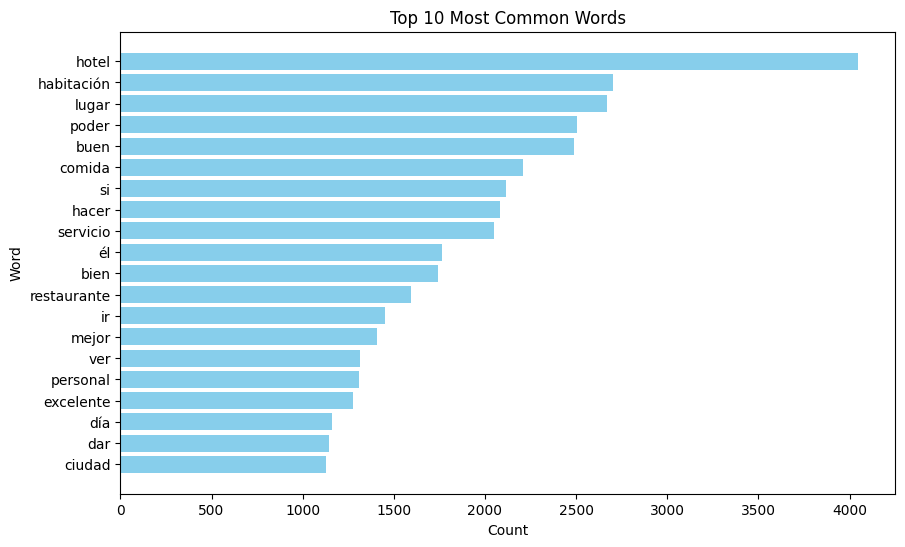

In [15]:
# Dividir la cadena en palabras individuales
All_words = [word for sublist in df['Review_Normalizado'] for word in sublist]

# Contar la frecuencia de cada palabra
word_counts = Counter(All_words)

# Obtener las 10 palabras más comunes
most_common_words = word_counts.most_common(20)

# Crear un DataFrame a partir de las palabras más comunes
word_df = pd.DataFrame(most_common_words, columns=['word', 'count'])

# Crear un gráfico de barras de las palabras más comunes
plt.figure(figsize=(10, 6))
plt.barh(word_df['word'], word_df['count'], color='skyblue')
plt.xlabel('Count')
plt.ylabel('Word')
plt.title('Top 20 Most Common Words')
plt.gca().invert_yaxis()
plt.show()


# **(20%) Modelado y evaluación.**

## Primer Modelo implementado - Naive Bayes (Felipe Rueda)

El modelo Naive Bayes es fácil de construir, muy rápido y adecuado para conjuntos de datos muy grandes. A pesar de su simplicidad, a menudo funciona sorprendentemente bien y se utiliza ampliamente porque a menudo supera a métodos de clasificación más sofisticados.

En el análisis de texto, el modelo Naive Bayes se utiliza a menudo para la clasificación de spam, el análisis de sentimientos y la categorización de documentos. En estos casos, las “características” son generalmente las palabras o n-gramas del documento a clasificar.

In [50]:
# @title separacion de variable predictoria y los textos a utilizar
df['Review_Normalizado'] = df['Review_Normalizado'].apply(lambda x: ' '.join(map(str, x)))
df

,Review,Class,Review_Normalizado
0,nos alojamos en una casa alquilada en la ciuda...,4,yo alogir en uno casa alquilado en el ciudad a...
1,la comida está bien pero nada especial yo tení...,3,el comida estar bien pero nada especial yo ten...
2,en mi opinión no es una como muchos usuarios r...,3,en mi opinión no ser uno como mucho usuario re...
3,esta curiosa forma que asemeja una silla de mo...,4,este curioso forma que asemejar uno silla de m...
4,lo mejor era la limonada me gusto la comida de...,2,él mejor ser el limonada yo gustar el comida d...
...,...,...,...
7870,el motivo de mi estancia fue porque vine a un ...,3,el motivo de mi estancia ser porque venir a un...
7871,es difícil revisar el castillo porque apenas p...,3,ser difícil revisar el castillo porque apenas ...
7872,si vas a mérida no puedes perderte de este lug...,5,si ir a mérida no poder perderte de este lugar...
7873,este imperdible sitio que lleva el nombre del ...,5,este imperdible sitio que llevar el nombre del...


In [52]:
X_data, y_data = df['Review_Normalizado'],df['Class']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_data,y_data, test_size=0.2, random_state=42)
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [53]:
# @title Generar modelo
model = MultinomialNB()
model.fit(X_train_vec, y_train)

MultinomialNB()

In [54]:
accuracy = model.score(X_test_vec, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.49333333333333335


In [55]:
model_2 = GaussianNB()

In [56]:
model_2.fit(X_train_vec.toarray(), y_train)

GaussianNB()

In [57]:
accuracy = model_2.score(X_test_vec.toarray(), y_test)
print("Accuracy:", accuracy)

Accuracy: 0.24825396825396825


# **(20%) Resultados.**

# **(10%) Mapa de actores relacionado con el producto de datos creado.**

# **(8%) Trabajo en equipo**